In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2020-03-30 Coronavirus Tweets.csv')
x = df.drop(columns=['verified'])
y = df['verified']
y

0         False
1          True
2         False
3          True
4         False
          ...  
586257    False
586258    False
586259    False
586260    False
586261    False
Name: verified, Length: 586262, dtype: bool

In [3]:
y.describe()
df.verified.value_counts()

False    520561
True      65701
Name: verified, dtype: int64

In [4]:
df.shape


(586262, 22)

In [5]:
labels = df.verified


In [6]:
x_train,x_test,y_train,y_test = train_test_split(df['text'].apply(lambda x: np.str_(x)),
                                                 labels.apply(lambda x: np.str_(x)),test_size=0.2,random_state=7)
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train.apply(lambda x: np.str_(x)))
tfidf_test = tfidf_vectorizer.transform(x_test.apply(lambda x: np.str_(x)))

In [7]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train,y_train)
y_pred = pac.predict(tfidf_test)

In [8]:
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred)

Accuracy: 91.07%


array([[100483,   3619],
       [  6857,   6294]], dtype=int64)

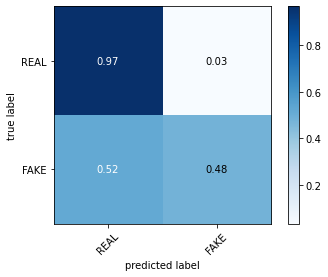

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

multiclass = np.array(confusion_matrix(y_test,y_pred))

class_names = ['REAL', 'FAKE']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print("Confusion matrix:", confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print("Accuracy:" ,accuracy_score(y_test, y_pred))

Confusion matrix: [[100483   3619]
 [  6857   6294]]
              precision    recall  f1-score   support

       False       0.94      0.97      0.95    104102
        True       0.63      0.48      0.55     13151

    accuracy                           0.91    117253
   macro avg       0.79      0.72      0.75    117253
weighted avg       0.90      0.91      0.91    117253

Accuracy: 0.910654738045082


In [33]:
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
print("Precision for False:",precision_score(y_test, y_pred, pos_label='False'))
print("Recall for False:",recall_score(y_test, y_pred, pos_label='False'))
print("F1 score for False:",f1_score(y_test, y_pred, pos_label='False'))
print("Accuracy:",accuracy_score(y_test, y_pred))

Precision for False: 0.9361188746040618
Recall for False: 0.9652360185202974
F1 score for False: 0.950454498160252
Accuracy: 0.910654738045082


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pac, tfidf_train, y_train, cv=10)
print("Cross validation on Accuracy for PA classifier:",(str(np.mean(scores)*100) + ' %'))

precision = cross_val_score(pac,tfidf_train, y_train,scoring='precision_weighted', cv=10)
recall = cross_val_score(pac,tfidf_train, y_train,scoring='recall_weighted', cv=10)
f1_score = cross_val_score(pac,tfidf_train, y_train,scoring='f1_weighted', cv=10)

print("Cross validation on Precision for Passic=ve Aggressive classifier:",(str(np.mean(precision)*100) + ' %'))
print("Cross validation on Recall for Passive Aggressive classifier:",(str(np.mean(recall)*100) + ' %'))
print("Cross validation on F1-score for Passive Aggressive classifier:",(str(np.mean(f1_score)*100) + ' %'))

Cross validation on Accuracy for PA classifier: 91.52063178580259 %


KeyboardInterrupt: 

In [79]:
test={"From Executive Producer @TappDaddy, it's Rage Against #COVID19 with CHILLIN' IN THE NAME. #BringThoseChipsIn https://t.co/JeSDEc5iC3"}
ans=tfidf_vectorizer.transform(test)
val=pac.predict(ans)
print(val)

['False']
